# Assignment - Car Price Prediction

- Dataset
  - https://www.kaggle.com/hellbuoy/car-price-prediction

## Problem Statement
- A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
- They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 
- The company wants to know:
  - Which variables are significant in predicting the price of a car
  - How well those variables describe the price of a car based on various market surveys
- the consulting firm has gathered a large data set of different types of cars across the America market.

## Task
  - We are required to model the price of cars with the available independent variables.
  - It will be used by the management to understand how exactly the prices vary with the independent variables.
  - They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
  - Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## WorkFlow
1. Load Data
2. Check Missing Values
  - If Exist ; Fill each record with mean of its feature
3. Split into 
  - 50% Training(Samples,Labels)
  - 30% Test(Samples,Labels)
  - 20% Validation Data(Samples,Labels)
4. Model
  - input Layer (No. of features )
  - 3 hidden layers including 10,8,6 unit
  - Output Layer with activation function relu/tanh
5. Compilation Step
  - Regression problem
    - select loss
    - select metrics
6. Train the Model with Epochs (100) and validate it
7. If the model gets overfit tune your model by
  - changing
    - units
    - No. of layers
    - activation function 
    - epochs
  - add dropout layer
  - add Regularizer
8. Evaluation Step
9. Prediction

## Solution

### Library Imports

In [1]:
# pandas imports
import pandas as pd
# numpy imports
import numpy as np
# matplot imports for ploting
import matplotlib.pyplot as plt
# sklearn for data pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# seaborn for finding co-relations
import seaborn as sns
# keras imports
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import regularizers

### 1. Load Data

In [2]:
# mount google drive so data can be assessed
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# path of folder with datasets
base_path = "/content/drive/MyDrive/DL_datasets/"
# path of folder with dataset of this project
data_path = "linear-scalar-regression_Car-Price-Prediction/"

In [4]:
# file containing label description
file_name = "linear-scalar-regression_Car-Price-Prediction.xlsx"
# before visulizing the data or even loading the data
# lets look at different labels and their description
labels_description = pd.read_excel(base_path+data_path+file_name)
labels_description

,Sr. No,Label,Description
0,1,Car_ID,Unique id of each observation (Interger)
1,2,Symboling,"Its assigned insurance risk rating, A value of..."
2,3,carCompany,Name of car company (Categorical)
3,4,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,5,aspiration,Aspiration used in a car (Categorical)
5,6,doornumber,Number of doors in a car (Categorical)
6,7,carbody,body of car (Categorical)
7,8,drivewheel,type of drive wheel (Categorical)
8,9,enginelocation,Location of car engine (Categorical)
9,10,wheelbase,Weelbase of car (Numeric)


In [5]:
# file containing data 
file_name = "linear-scalar-regression_Car-Price-Prediction.csv"
# Load data 
cars_data = pd.read_csv(base_path+data_path+file_name)

In [6]:
# check how the data looks and if it correctly loaded
cars_data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 2. Check Missing Values
  - If Exist ; Fill each record with mean of its feature

In [7]:
# first check shape of the data
cars_data.shape

(205, 26)

In [8]:
# check for null values
cars_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- there is no null values in the data

### 3. Split into
- 50% Training(Samples,Labels)
- 30% Test(Samples,Labels)
- 20% Validation Data(Samples,Labels)

- before splitting the data we need to inspect the data

In [9]:
# check info about data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
# There are 10 columns with dtype of object
# So extract columns where dtype is object 
cars_data.columns[cars_data.dtypes == "object"]

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [12]:
# Need to convert non-mueric values to numeric
labelEncoder = preprocessing.LabelEncoder()
cars_data["CarName"] = labelEncoder.fit_transform(cars_data["CarName"])
cars_data["fueltype"] = labelEncoder.fit_transform(cars_data["fueltype"])
cars_data["aspiration"] = labelEncoder.fit_transform(cars_data["aspiration"])
cars_data["doornumber"] = labelEncoder.fit_transform(cars_data["doornumber"])
cars_data["carbody"] = labelEncoder.fit_transform(cars_data["carbody"])
cars_data["drivewheel"] = labelEncoder.fit_transform(cars_data["drivewheel"])
cars_data["enginelocation"] = labelEncoder.fit_transform(cars_data["enginelocation"])
cars_data["enginetype"] = labelEncoder.fit_transform(cars_data["enginetype"])
cars_data["cylindernumber"] = labelEncoder.fit_transform(cars_data["cylindernumber"])
cars_data["fuelsystem"] = labelEncoder.fit_transform(cars_data["fuelsystem"])

In [13]:
# check info about data again
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [14]:
# still we have data in int64 form.
# convert all the data to float64
cars_data = cars_data.astype("float64")

In [15]:
# check info about data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   CarName           205 non-null    float64
 3   fueltype          205 non-null    float64
 4   aspiration        205 non-null    float64
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    float64
 7   drivewheel        205 non-null    float64
 8   enginelocation    205 non-null    float64
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    float64
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    float64
 1

In [16]:
# check for duplicates
cars_data.duplicated().sum()

0

- Now all of data is numeric and float64 with no duplicates
- We can split this data to required sets

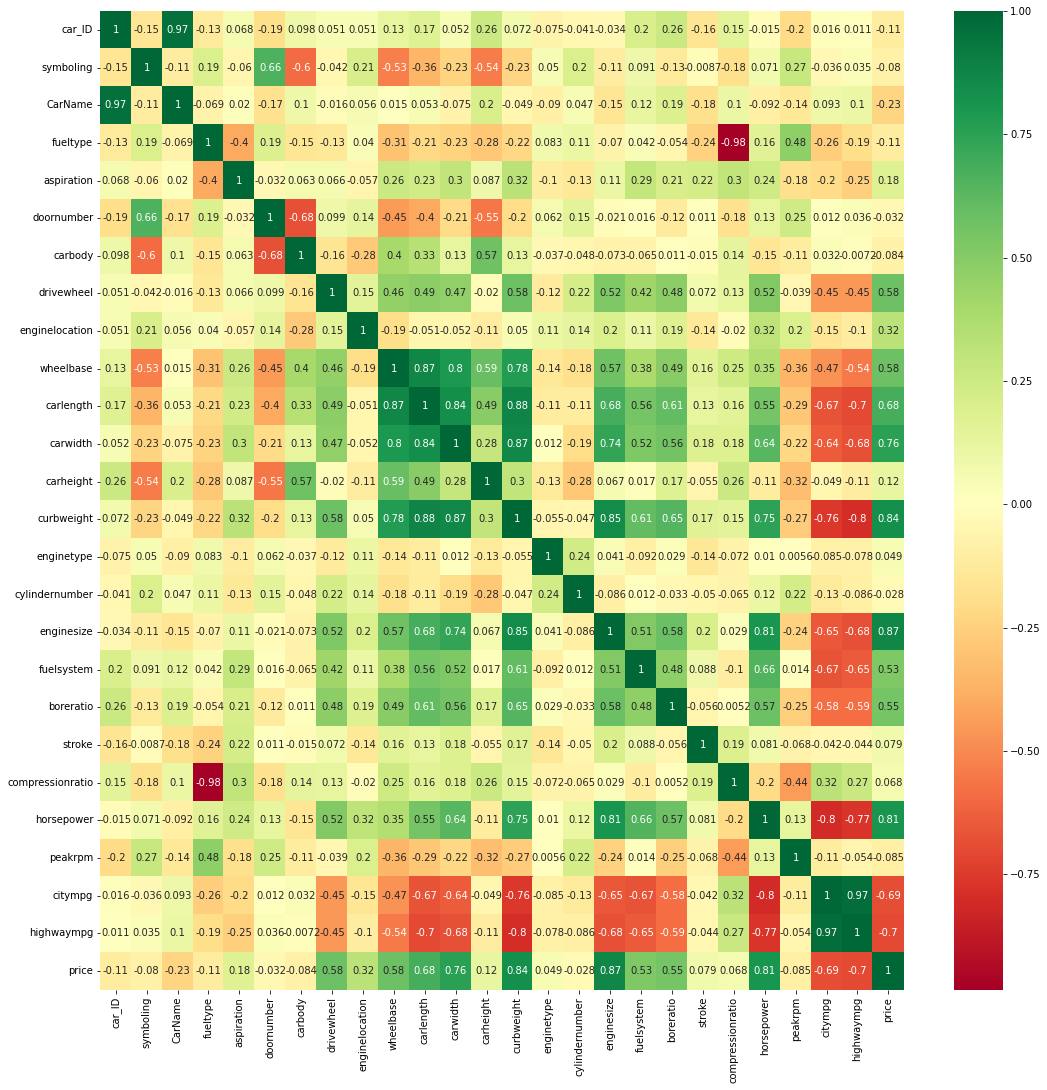

In [17]:
# Feature engineering is an important aspect
# with new models we dont need manual working
# still for fun have a look at co-relation 
corrmat = cars_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize =(18,18))
g = sns.heatmap(cars_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
# before moving forward
# data shape
cars_data.shape

(205, 26)

In [19]:
# data
cars_data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,3.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,130.0,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,130.0,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,...,152.0,5.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,4.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,...,109.0,5.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,5.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,...,136.0,5.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [21]:
# split data
# split into data and targets
data = cars_data.loc[:,cars_data.columns != "price"]
targets = cars_data.loc[:,cars_data.columns == "price"]
# look into data
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.0,3.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,2.0,130.0,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,2.0,3.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,...,2.0,130.0,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,3.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,...,3.0,152.0,5.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,4.0,2.0,4.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,...,2.0,109.0,5.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,5.0,2.0,5.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,...,1.0,136.0,5.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0


In [22]:
# look into targets
targets.head(5)

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [23]:
# split data to train and test
# 30% test
# 70% rest
train_val_data, test_data, train_val_targets, test_targets = train_test_split(data, targets, test_size=0.3, random_state=1)

In [24]:
# look into data shape
print("Shape of test data : ",test_data.shape)
print("Shape of test targets : ",test_targets.shape)
print("Shape of train+val data : ",train_val_data.shape)
print("Shape of train+val targets : ",train_val_targets.shape)

Shape of test data :  (62, 25)
Shape of test targets :  (62, 1)
Shape of train+val data :  (143, 25)
Shape of train+val targets :  (143, 1)


In [25]:
# data description
train_val_data.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,104.503497,0.825175,77.986014,0.909091,0.174825,0.405594,2.643357,1.335664,0.020979,98.747552,...,2.097902,128.496503,3.356643,3.337622,3.224825,10.083357,106.902098,5129.370629,24.811189,30.328671
std,59.393991,1.285426,41.121768,0.288490,0.381153,0.492733,0.883380,0.568468,0.143818,5.956424,...,0.762822,41.278319,1.990844,0.272159,0.315513,3.876047,41.812006,457.962753,6.414059,6.693255
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,0.000000,70.000000,0.000000,2.540000,2.070000,7.000000,56.000000,4150.000000,13.000000,16.000000
25%,55.500000,0.000000,47.500000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,2.000000,98.000000,1.000000,3.150000,3.100000,8.500000,70.000000,4800.000000,19.000000,25.000000
50%,105.000000,1.000000,82.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,2.000000,120.000000,5.000000,3.330000,3.255000,9.000000,97.000000,5200.000000,24.000000,30.000000
75%,154.500000,2.000000,113.500000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.200000,...,2.000000,143.000000,5.000000,3.580000,3.400000,9.400000,120.500000,5500.000000,30.000000,34.000000
max,204.000000,3.000000,145.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,115.600000,...,6.000000,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [26]:
# before further processing first normalize data
mean = train_val_data.mean(axis=0)
train_val_data -= mean
std = train_val_data.std(axis=0)
train_val_data /= std
test_data -= mean
test_data /= std

In [27]:
# data description
train_val_data.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,-6.055762e-17,2.562053e-17,1.708035e-17,1.420775e-16,6.599228e-17,-3.416071e-17,1.242208e-17,9.627109e-17,-2.329139e-17,1.858265e-15,...,6.016943e-17,5.279382e-17,-4.813554e-17,2.293426e-15,8.332107e-15,1.816729e-16,-1.319846e-16,6.009179e-16,2.088461e-16,-2.092343e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.742659e+00,-2.197851e+00,-1.896465e+00,-3.151201e+00,-4.586751e-01,-8.231532e-01,-2.992321e+00,-2.349586e+00,-1.458723e-01,-2.039403e+00,...,-2.750187e+00,-1.417124e+00,-1.686041e+00,-2.930725e+00,-3.660146e+00,-7.954901e-01,-1.217404e+00,-2.138538e+00,-1.841453e+00,-2.140763e+00
25%,-8.250582e-01,-6.419467e-01,-7.413595e-01,3.151201e-01,-4.586751e-01,-8.231532e-01,-7.282897e-01,-5.904720e-01,-1.458723e-01,-7.131044e-01,...,-1.283420e-01,-7.388020e-01,-1.183741e+00,-6.893859e-01,-3.956255e-01,-4.084978e-01,-8.825718e-01,-7.192083e-01,-9.060080e-01,-7.961255e-01
50%,8.359490e-03,1.360057e-01,9.761219e-02,3.151201e-01,-4.586751e-01,-8.231532e-01,4.037258e-01,-5.904720e-01,-1.458723e-01,-2.933895e-01,...,-1.283420e-01,-2.058345e-01,8.254573e-01,-2.800711e-02,9.563721e-02,-2.795004e-01,-2.368243e-01,1.542251e-01,-1.264704e-01,-4.910486e-02
75%,8.417771e-01,9.139580e-01,8.636298e-01,3.151201e-01,-4.586751e-01,1.206345e+00,4.037258e-01,1.168642e+00,-1.458723e-01,5.796175e-01,...,-1.283420e-01,3.513587e-01,8.254573e-01,8.905746e-01,5.552056e-01,-1.763025e-01,3.252153e-01,8.093003e-01,8.089746e-01,5.485117e-01
max,1.675195e+00,1.691910e+00,1.629647e+00,3.151201e-01,2.164946e+00,1.206345e+00,1.535741e+00,1.168642e+00,6.807373e+00,2.829289e+00,...,5.115347e+00,4.784679e+00,1.830056e+00,2.213332e+00,2.995672e+00,3.332427e+00,4.331242e+00,3.211242e+00,3.771217e+00,3.536594e+00


In [28]:
# split data to train and val
# 29% val
# 71% train
train_data, val_data, train_targets, val_targets = train_test_split(train_val_data, train_val_targets, test_size=0.29, random_state=1)

In [29]:
# data shape
cars_data.shape

(205, 26)

In [30]:
# look into data shape
print("Shape of train data : ",train_data.shape)
print("Shape of train targets : ",train_targets.shape)
print("Shape of val data : ",val_data.shape)
print("Shape of val targets : ",val_targets.shape)

Shape of train data :  (101, 25)
Shape of train targets :  (101, 1)
Shape of val data :  (42, 25)
Shape of val targets :  (42, 1)


- we have training(50%), testing(30%) and validation(20%) data ready

### 4. Model
  - input Layer (No. of features )
  - 3 hidden layers including 10,8,6 unit
  - Output Layer with activation function relu/tanh

In [31]:
# model defination
model = keras.Sequential([
    layers.Dense(25, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(6, activation="relu"),
    layers.Dense(1)
])

### 5. Compilation Step
  - Regression problem
    - select loss
    - select metrics

In [32]:
# model compilation
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

### 6. Train the Model with Epochs (100) and validate it

In [33]:
# model training
history = model.fit(
        train_data, 
        train_targets,
        validation_data=(val_data, val_targets),
        epochs=100, 
        verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 75ms/step - loss: 295513344.0000 - mae: 14721.2002 - val_loss: 135476944.0000 - val_mae: 10771.8242
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 295503520.0000 - mae: 14720.9229 - val_loss: 135472992.0000 - val_mae: 10771.6533
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 295495680.0000 - mae: 14720.7070 - val_loss: 135469424.0000 - val_mae: 10771.4980
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 295488736.0000 - mae: 14720.5137 - val_loss: 135465632.0000 - val_mae: 10771.3379
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 295481056.0000 - mae: 14720.3008 - val_loss: 135460544.0000 - val_mae: 10771.1270
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 295471072.0000 - mae: 14720.0195 - val_loss: 135456480.0000 - val_mae: 10770.9521
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 2954

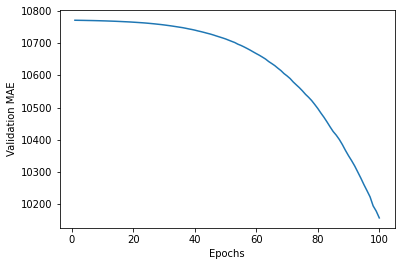

In [34]:
# plot mae to visulize results
plt.plot(range(1, len(history.history["val_mae"]) + 1), history.history["val_mae"])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [35]:
val_targets.describe()

,price
count,42.000000
mean,10772.369048
std,4463.137662
min,5195.000000
25%,7448.500000
50%,9516.500000
75%,12943.750000
max,23875.000000


- to much loass during vlidation

- This learning was based on the requirements of the given task

- This model never started to overfit so lets try it using sme other methods

### 7. If the model gets overfit tune your model by
- changing
  - units
  - No. of layers
  - activation function 
  - epochs
- add dropout layer
- add Regularizer

- before implementing the requirements as these are for tuning overfitting first we need the model to overfit
  - with very less data available use k-fold validation to train model

In [36]:
# build model again with the same parameters as above
def build_model():
  model = keras.Sequential([
    layers.Dense(25, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(6, activation="relu"),
    layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [37]:
# Listing 4.27 Saving the validation logs at each fold

# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_val_data) // k
# number of epochs
num_epochs = 700
# a list to store history on each fold
all_mae_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_val_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # select validation data during each fold
    partial_train_data = np.concatenate(
        [train_val_data[:i * num_val_samples],
         train_val_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_val_targets[:i * num_val_samples],
         train_val_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()

    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,  
        verbose=0)
    
    # get final score and append to list
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [38]:
# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

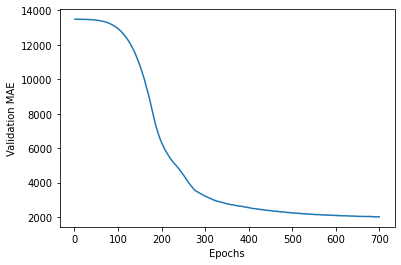

In [39]:
# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- Model still dont over fitt. lets update few parametrs to make ut overfitt

- change learning rate

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


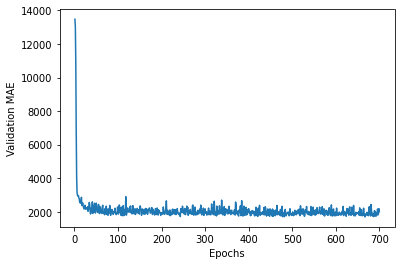

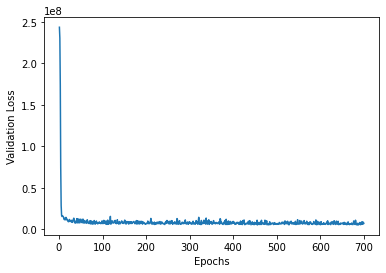

In [40]:
# build model again with the new learning rate and layers
def build_model():
  model = keras.Sequential([
    layers.Dense(25, activation="relu"),
    layers.Dense(20, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(14, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(6, activation="relu"),
    layers.Dense(1)
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="mse", metrics=["mae"])
  return model

# Saving the validation logs at each fold

# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_val_data) // k
# number of epochs
num_epochs = 700
# a list to store history on each fold
all_mae_histories = []
all_mae_loss_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_val_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # select validation data during each fold
    partial_train_data = np.concatenate(
        [train_val_data[:i * num_val_samples],
         train_val_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_val_targets[:i * num_val_samples],
         train_val_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()

    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,  
        verbose=0)
    
    # get final score and append to list
    mae_history = history.history["val_mae"]
    mae_loss = history.history["val_loss"]
    all_mae_histories.append(mae_history)
    all_mae_loss_histories.append(mae_loss)

# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_loss = [np.mean([x[i] for x in all_mae_loss_histories]) for i in range(num_epochs)]

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# Plotting validation scores
plt.plot(range(1, len(average_mae_loss) + 1), average_mae_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

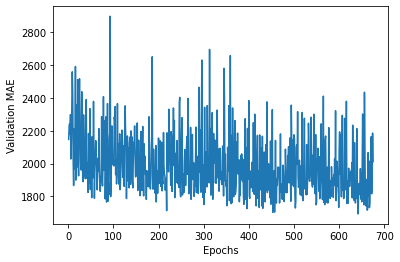

In [41]:
# Plotting validation scores, excluding the first 50 data points
truncated_mae_history = average_mae_history[25:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- Now our model is overfitting at aroud 200th apoch now lets tune our model

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


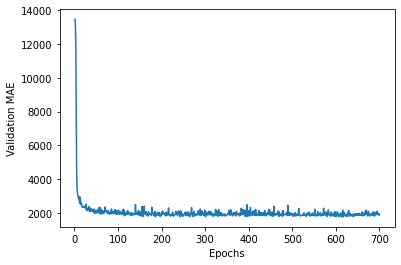

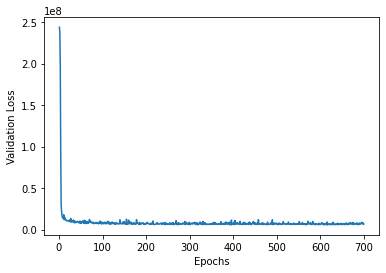

In [42]:
# build model again with the new units and layers
def build_model():
  model = keras.Sequential([
    layers.Dense(24, activation="relu"),
    layers.Dense(20, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(12, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1)
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="mse", metrics=["mae"])
  return model

# Saving the validation logs at each fold

# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_val_data) // k
# number of epochs
num_epochs = 700
# a list to store history on each fold
all_mae_histories = []
all_mae_loss_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_val_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # select validation data during each fold
    partial_train_data = np.concatenate(
        [train_val_data[:i * num_val_samples],
         train_val_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_val_targets[:i * num_val_samples],
         train_val_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()

    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,  
        verbose=0)
    
    # get final score and append to list
    mae_history = history.history["val_mae"]
    mae_loss = history.history["val_loss"]
    all_mae_histories.append(mae_history)
    all_mae_loss_histories.append(mae_loss)

# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_loss = [np.mean([x[i] for x in all_mae_loss_histories]) for i in range(num_epochs)]

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# Plotting validation scores
plt.plot(range(1, len(average_mae_loss) + 1), average_mae_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

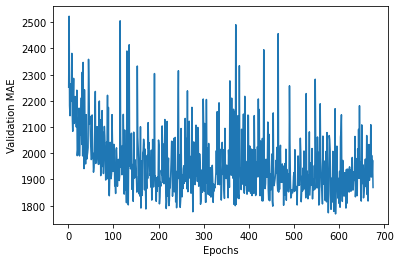

In [43]:
# Plotting validation scores, excluding the first 50 data points
truncated_mae_history = average_mae_history[25:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- there is much improvement in MAE and overfitting
- Now add weight regulizers in the above model

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


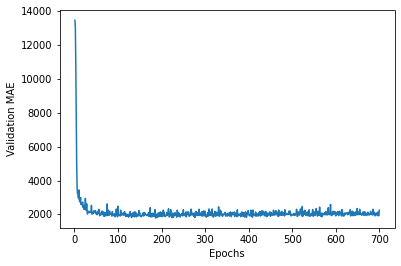

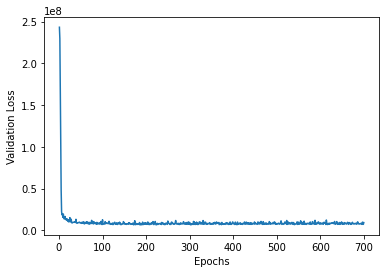

In [44]:
# build model again with regulizers
def build_model():
  model = keras.Sequential([
    layers.Dense(24,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(20,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(12,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(8,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(4,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1)
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="mse", metrics=["mae"])
  return model

# Saving the validation logs at each fold

# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_val_data) // k
# number of epochs
num_epochs = 700
# a list to store history on each fold
all_mae_histories = []
all_mae_loss_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_val_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # select validation data during each fold
    partial_train_data = np.concatenate(
        [train_val_data[:i * num_val_samples],
         train_val_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_val_targets[:i * num_val_samples],
         train_val_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()

    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,  
        verbose=0)
    
    # get final score and append to list
    mae_history = history.history["val_mae"]
    mae_loss = history.history["val_loss"]
    all_mae_histories.append(mae_history)
    all_mae_loss_histories.append(mae_loss)

# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_loss = [np.mean([x[i] for x in all_mae_loss_histories]) for i in range(num_epochs)]

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# Plotting validation scores
plt.plot(range(1, len(average_mae_loss) + 1), average_mae_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

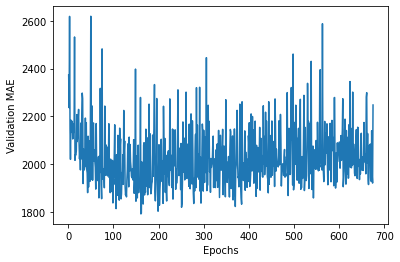

In [45]:
# Plotting validation scores, excluding the first 50 data points
truncated_mae_history = average_mae_history[25:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- regulization improved the mae a bit and model ovefits clearly

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


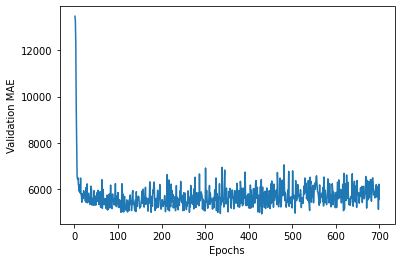

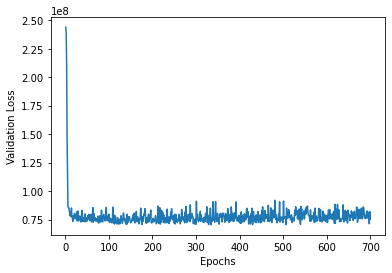

In [46]:
# build model again with dropout
def build_model():
  model = keras.Sequential([
    layers.Dense(24,activation="relu"),layers.Dropout(0.1),
    layers.Dense(20,activation="relu"),layers.Dropout(0.1),
    layers.Dense(16,activation="relu"),layers.Dropout(0.1),
    layers.Dense(12,activation="relu"),layers.Dropout(0.1),
    layers.Dense(8,activation="relu"),layers.Dropout(0.1),
    layers.Dense(4,activation="relu"),layers.Dropout(0.1),
    layers.Dense(1)
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="mse", metrics=["mae"])
  return model

# Saving the validation logs at each fold

# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_val_data) // k
# number of epochs
num_epochs = 700
# a list to store history on each fold
all_mae_histories = []
all_mae_loss_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_val_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # select validation data during each fold
    partial_train_data = np.concatenate(
        [train_val_data[:i * num_val_samples],
         train_val_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_val_targets[:i * num_val_samples],
         train_val_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()

    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,  
        verbose=0)
    
    # get final score and append to list
    mae_history = history.history["val_mae"]
    mae_loss = history.history["val_loss"]
    all_mae_histories.append(mae_history)
    all_mae_loss_histories.append(mae_loss)

# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_loss = [np.mean([x[i] for x in all_mae_loss_histories]) for i in range(num_epochs)]

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# Plotting validation scores
plt.plot(range(1, len(average_mae_loss) + 1), average_mae_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

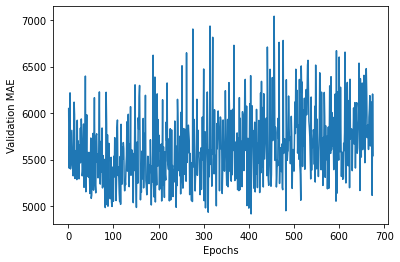

In [47]:
# Plotting validation scores, excluding the first 50 data points
truncated_mae_history = average_mae_history[25:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- adding dropout also didnt help in any way
- so skip the droput

- Now change the activation function

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


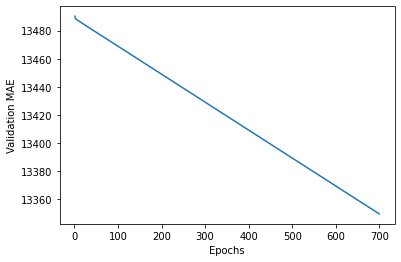

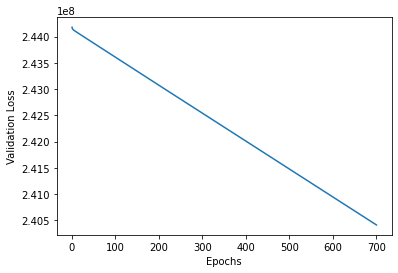

In [48]:
# build model again with tanh activation function
def build_model():
  model = keras.Sequential([
    layers.Dense(24,kernel_regularizer=regularizers.l2(0.002), activation="tanh"),
    layers.Dense(20,kernel_regularizer=regularizers.l2(0.002), activation="tanh"),
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.002), activation="tanh"),
    layers.Dense(12,kernel_regularizer=regularizers.l2(0.002), activation="tanh"),
    layers.Dense(8,kernel_regularizer=regularizers.l2(0.002), activation="tanh"),
    layers.Dense(4,kernel_regularizer=regularizers.l2(0.002), activation="tanh"),
    layers.Dense(1)
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="mse", metrics=["mae"])
  return model

# Saving the validation logs at each fold

# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_val_data) // k
# number of epochs
num_epochs = 700
# a list to store history on each fold
all_mae_histories = []
all_mae_loss_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_val_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # select validation data during each fold
    partial_train_data = np.concatenate(
        [train_val_data[:i * num_val_samples],
         train_val_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_val_targets[:i * num_val_samples],
         train_val_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()

    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,  
        verbose=0)
    
    # get final score and append to list
    mae_history = history.history["val_mae"]
    mae_loss = history.history["val_loss"]
    all_mae_histories.append(mae_history)
    all_mae_loss_histories.append(mae_loss)

# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_loss = [np.mean([x[i] for x in all_mae_loss_histories]) for i in range(num_epochs)]

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# Plotting validation scores
plt.plot(range(1, len(average_mae_loss) + 1), average_mae_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

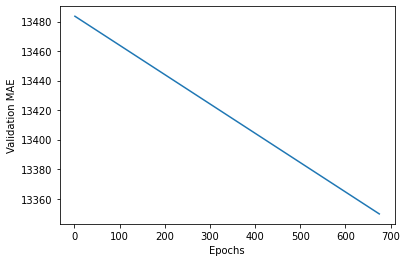

In [49]:
# Plotting validation scores, excluding the first 50 data points
truncated_mae_history = average_mae_history[25:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- tanh activation function rather than correcting the model worsen it
- So define the final model

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


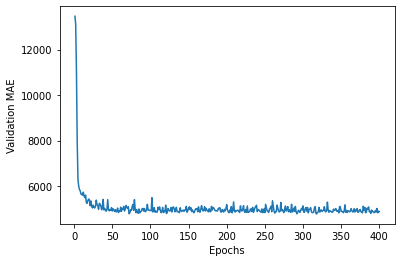

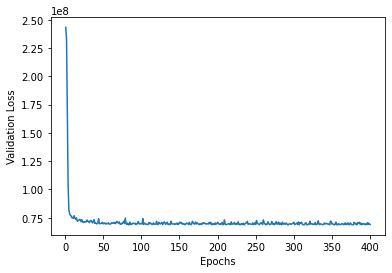

In [50]:
# final model and its validation 
  # Sequential Model
    # 7 layers (24, 20, 16, 12, 8, 4, 1) units
    # relu activation function
    # learningrate of 0.01
    # RMSprop aptimizer
    # mse loss
    # mae matrics
    # regularizer l2
def build_model():
  model = keras.Sequential([
    layers.Dense(24,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(20,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(12,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(8,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(4,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1)
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="mse", metrics=["mae"])
  return model

# model training with K fold validation

# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_val_data) // k
# number of epochs
num_epochs = 400
# a list to store history on each fold
all_mae_histories = []
all_mae_loss_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_val_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # select validation data during each fold
    partial_train_data = np.concatenate(
        [train_val_data[:i * num_val_samples],
         train_val_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_val_targets[:i * num_val_samples],
         train_val_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()

    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,  
        verbose=0)
    
    # get final score and append to list
    mae_history = history.history["val_mae"]
    mae_loss = history.history["val_loss"]
    all_mae_histories.append(mae_history)
    all_mae_loss_histories.append(mae_loss)

# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_loss = [np.mean([x[i] for x in all_mae_loss_histories]) for i in range(num_epochs)]

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# Plotting validation scores
plt.plot(range(1, len(average_mae_loss) + 1), average_mae_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

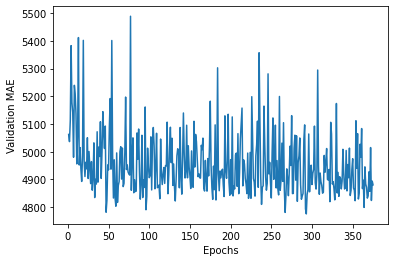

In [51]:
# Plotting validation scores, excluding the first 25 data points
truncated_mae_history = average_mae_history[25:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- now train the model for 100 apochs as the model start to overfitt around 100th apoch

In [52]:
# Training the final model
def build_model():
  model = keras.Sequential([
    layers.Dense(24,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(20,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(12,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(8,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(4,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1)
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="mse", metrics=["mae"])
  return model
model = build_model()
model.fit(train_val_data, train_val_targets,epochs=100,verbose=1)


Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 248255584.0000 - mae: 13555.0996
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 238592480.0000 - mae: 13289.8105
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 174378464.0000 - mae: 11248.6455
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 49230320.0000 - mae: 5694.7397
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 15248200.0000 - mae: 3110.7190
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 13498278.0000 - mae: 2891.6824
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 10666458.0000 - mae: 2608.0898
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 9182466.0000 - mae: 2362.5935
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 8615383.0000 - mae: 2318.4631
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 821342

### 8. Evaluation Step

In [53]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 6ms/step - loss: 6236679.5000 - mae: 1771.2037


In [54]:
test_mae_score

1771.2037353515625

- a for better score

### 9. Prediction

In [55]:
# test target for 1st car
test_targets.values

array([[ 6669. ],
       [ 7999. ],
       [ 6338. ],
       [ 8916.5],
       [10295. ],
       [25552. ],
       [ 8249. ],
       [ 5151. ],
       [ 6488. ],
       [10245. ],
       [17450. ],
       [17669. ],
       [16515. ],
       [ 9095. ],
       [12964. ],
       [11199. ],
       [ 9980. ],
       [ 6529. ],
       [18150. ],
       [11259. ],
       [ 8948. ],
       [ 6855. ],
       [16925. ],
       [ 7957. ],
       [ 9989. ],
       [ 7129. ],
       [14489. ],
       [ 7995. ],
       [ 6229. ],
       [ 7295. ],
       [ 8058. ],
       [ 8921. ],
       [41315. ],
       [ 9295. ],
       [17950. ],
       [ 7775. ],
       [ 8558. ],
       [32250. ],
       [15645. ],
       [22625. ],
       [ 5118. ],
       [18399. ],
       [ 7099. ],
       [10198. ],
       [ 8195. ],
       [ 7799. ],
       [40960. ],
       [ 6095. ],
       [18150. ],
       [13499. ],
       [28176. ],
       [11900. ],
       [24565. ],
       [ 9258. ],
       [ 8845. ],
       [ 6

In [56]:
# predection for first house in the test sample
predictions = model.predict(test_data)

In [57]:
predictions

array([[ 5032.005 ],
       [ 7177.4155],
       [ 5399.09  ],
       [ 5691.5337],
       [ 9657.239 ],
       [27814.89  ],
       [ 5454.7446],
       [ 7708.8403],
       [ 6792.3286],
       [ 9171.039 ],
       [15966.193 ],
       [11841.5625],
       [14403.684 ],
       [ 8961.287 ],
       [17056.752 ],
       [10277.112 ],
       [10689.6045],
       [ 6105.689 ],
       [17445.72  ],
       [11288.039 ],
       [10081.338 ],
       [ 6346.9536],
       [14476.938 ],
       [ 7776.474 ],
       [ 9743.516 ],
       [ 5974.7783],
       [14110.296 ],
       [ 7653.8257],
       [ 7167.455 ],
       [ 7747.772 ],
       [ 4545.8765],
       [12153.4795],
       [30479.885 ],
       [11102.021 ],
       [14969.976 ],
       [ 5012.245 ],
       [ 7306.7725],
       [37156.88  ],
       [16365.752 ],
       [18656.5   ],
       [ 6509.0767],
       [19122.283 ],
       [ 5684.6445],
       [10387.318 ],
       [ 9750.359 ],
       [ 5828.689 ],
       [45707.27  ],
       [ 5834

In [58]:
test_prediction_difference = test_targets.values - predictions

In [59]:
test_prediction_difference

array([[ 1636.99511719],
       [  821.58447266],
       [  938.91015625],
       [ 3224.96630859],
       [  637.76074219],
       [-2262.890625  ],
       [ 2794.25537109],
       [-2557.84033203],
       [ -304.32861328],
       [ 1073.9609375 ],
       [ 1483.80664062],
       [ 5827.4375    ],
       [ 2111.31640625],
       [  133.71289062],
       [-4092.75195312],
       [  921.88769531],
       [ -709.60449219],
       [  423.31103516],
       [  704.27929688],
       [  -29.0390625 ],
       [-1133.33789062],
       [  508.04638672],
       [ 2448.06152344],
       [  180.52587891],
       [  245.484375  ],
       [ 1154.22167969],
       [  378.70410156],
       [  341.17431641],
       [ -938.45507812],
       [ -452.77197266],
       [ 3512.12353516],
       [-3232.47949219],
       [10835.11523438],
       [-1807.02148438],
       [ 2980.02441406],
       [ 2762.75488281],
       [ 1251.22753906],
       [-4906.87890625],
       [ -720.75195312],
       [ 3968.5       ],


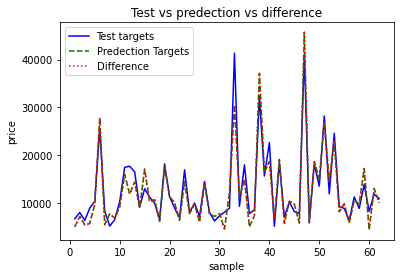

In [60]:
# plotting test results
sample = range(1, len(test_prediction_difference)+1)
plt.plot(sample, test_targets.values, "b-", label="Test targets",color='blue')
plt.plot(sample, predictions, "b--", label="Predection Targets",color='green')
plt.plot(sample, predictions, "b:", label="Difference",color='red')
plt.title("Test vs predection vs difference")
plt.xlabel("sample")
plt.ylabel("price")
plt.legend()

- The END